In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [ ]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.shape

(1470, 35)

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

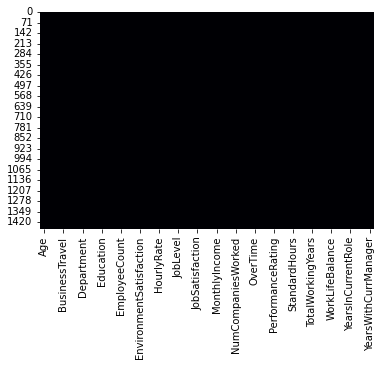

In [ ]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


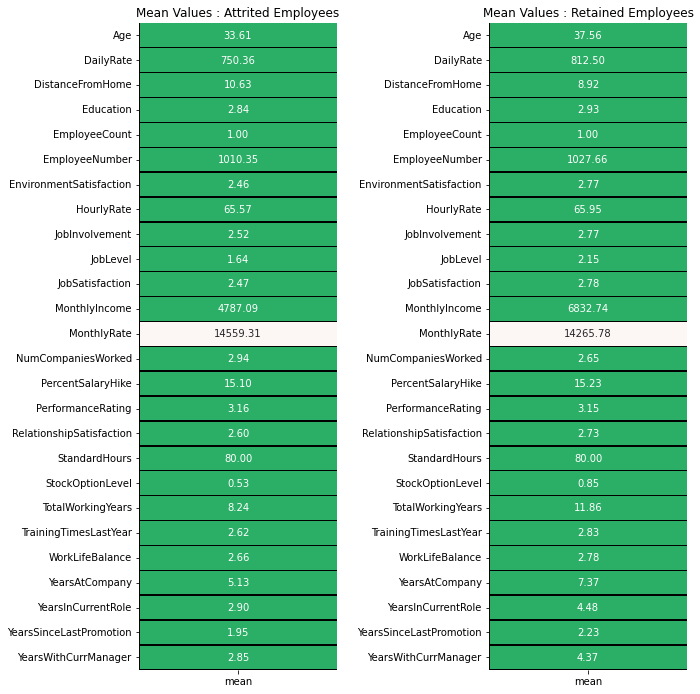

In [ ]:
yes = data[data['Attrition'] == 'Yes'].describe().T
no = data[data['Attrition'] == 'No'].describe().T
colors = ['#2BAE66','#FCF6F5']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Mean Values : Attrited Employees');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Mean Values : Retained Employees');

fig.tight_layout(pad = 2)

In [ ]:
discrete_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

df1 = data.copy(deep = True)

In [ ]:
le = LabelEncoder()
l1 = []; l2 = []; text_categorical_features = []
print('Label Encoder Transformation')
list_rs = []
for i in tqdm(categorical_features):
    if type(df1[i][0]) == str:
        text_categorical_features.append(i)
        df1[i] = le.fit_transform(df1[i])
        l1.append(list(df1[i].unique())); l2.append(list(le.inverse_transform(df1[i].unique())))
        print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))
        list_rs.append([i,list(df1[i].unique()),list(le.inverse_transform(df1[i].unique()))])
df_label = pd.DataFrame(list_rs, columns=['Feature', 'Label_Encoded', 'Label_Text'])
df_label

Label Encoder Transformation


100%|██████████| 20/20 [00:00<00:00, 162.64it/s]

Attrition  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
Over18  :  [0]  =  ['Y']
OverTime  :  [1 0]  =  ['Yes' 'No']


,Feature,Label_Encoded,Label_Text
0,Attrition,"[1, 0]","[Yes, No]"
1,BusinessTravel,"[2, 1, 0]","[Travel_Rarely, Travel_Frequently, Non-Travel]"
2,Department,"[2, 1, 0]","[Sales, Research & Development, Human Resources]"
3,EducationField,"[1, 4, 3, 2, 5, 0]","[Life Sciences, Other, Medical, Marketing, Tec..."
4,Gender,"[0, 1]","[Female, Male]"
5,JobRole,"[7, 6, 2, 4, 0, 3, 8, 5, 1]","[Sales Executive, Research Scientist, Laborato..."
6,MaritalStatus,"[2, 1, 0]","[Single, Married, Divorced]"
7,Over18,[0],[Y]
8,OverTime,"[1, 0]","[Yes, No]"


In [ ]:
tf1 = {}
for i in range(len(text_categorical_features)):
    tf1[text_categorical_features[i]] = {}
    for j,k in zip(l1[i],l2[i]):
        tf1[text_categorical_features[i]][j] = k
tf1

{'Attrition': {1: 'Yes', 0: 'No'},
 'BusinessTravel': {2: 'Travel_Rarely',
  1: 'Travel_Frequently',
  0: 'Non-Travel'},
 'Department': {2: 'Sales', 1: 'Research & Development', 0: 'Human Resources'},
 'EducationField': {1: 'Life Sciences',
  4: 'Other',
  3: 'Medical',
  2: 'Marketing',
  5: 'Technical Degree',
  0: 'Human Resources'},
 'Gender': {0: 'Female', 1: 'Male'},
 'JobRole': {7: 'Sales Executive',
  6: 'Research Scientist',
  2: 'Laboratory Technician',
  4: 'Manufacturing Director',
  0: 'Healthcare Representative',
  3: 'Manager',
  8: 'Sales Representative',
  5: 'Research Director',
  1: 'Human Resources'},
 'MaritalStatus': {2: 'Single', 1: 'Married', 0: 'Divorced'},
 'Over18': {0: 'Y'},
 'OverTime': {1: 'Yes', 0: 'No'}}

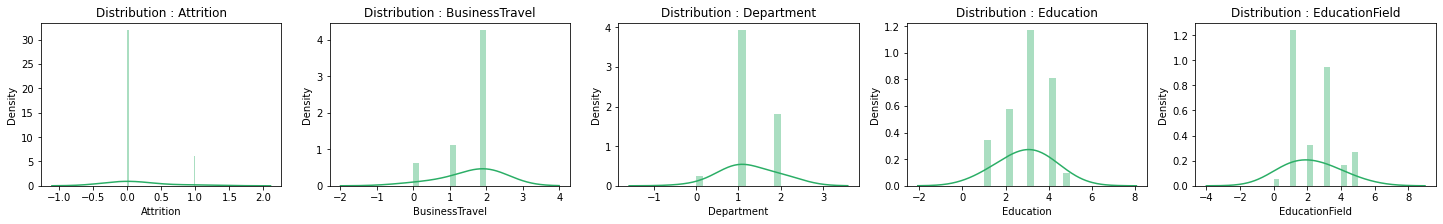

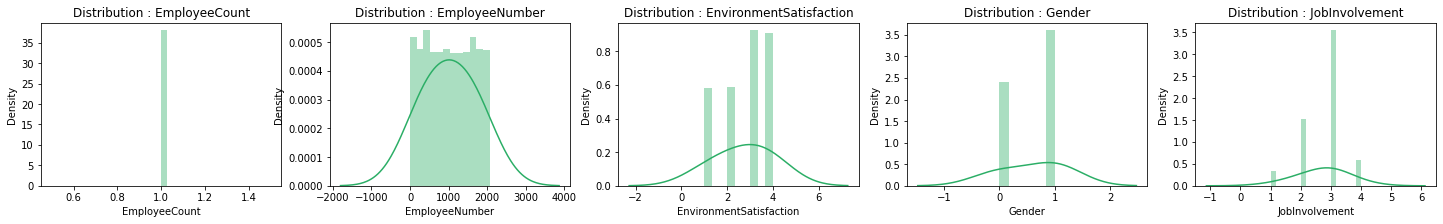

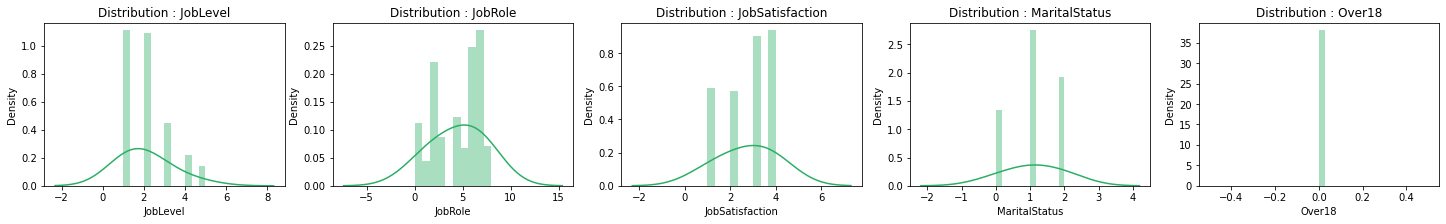

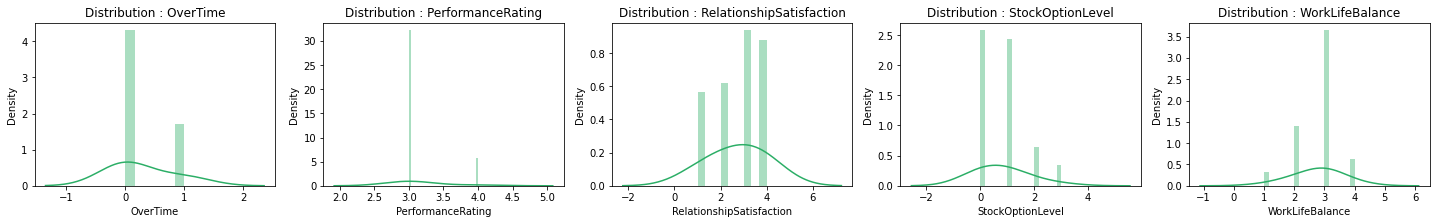

In [ ]:
for i in range(4):
    fig, ax = plt.subplots(nrows = 1,ncols = 5,figsize = (25,3))
    a = 1
    for j in categorical_features[(i*5) : (i*5) + 5]:
        plt.subplot(1,5,a) 
        sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

In [ ]:
df1.drop(columns = ['EmployeeCount', 'EmployeeNumber', 'Over18'], inplace = True)
categorical_features.remove('EmployeeCount'); categorical_features.remove('EmployeeNumber') 
categorical_features.remove('Over18'); categorical_features.remove('Attrition')

In [ ]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2


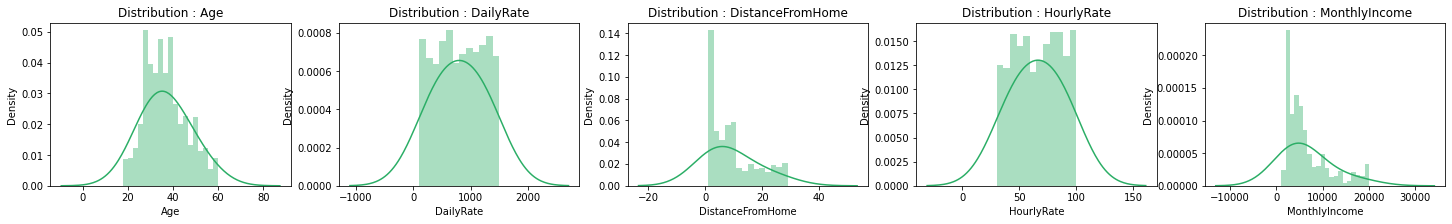

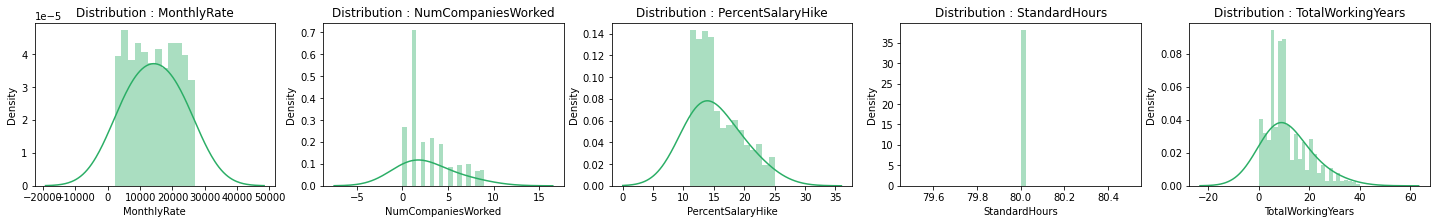

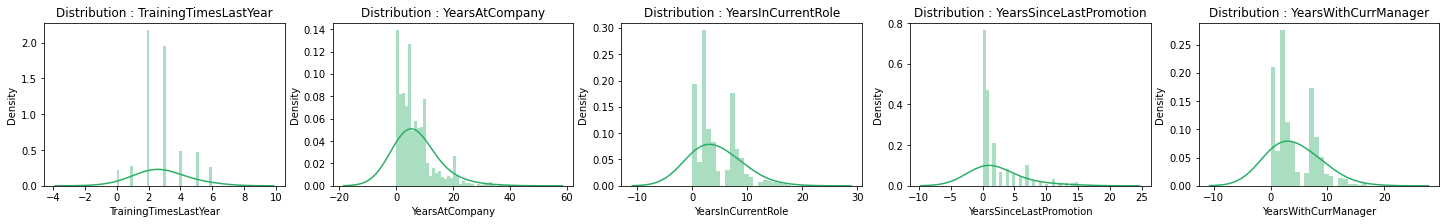

In [ ]:
for i in range(3):
    fig, ax = plt.subplots(nrows = 1,ncols = 5,figsize = (25,3))
    a = 1
    for j in discrete_features[(i*5) : (i*5) + 5]:
        plt.subplot(1,5,a) 
        sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

In [ ]:
df1.drop(columns = ['StandardHours'], inplace = True)
discrete_features.remove('StandardHours')

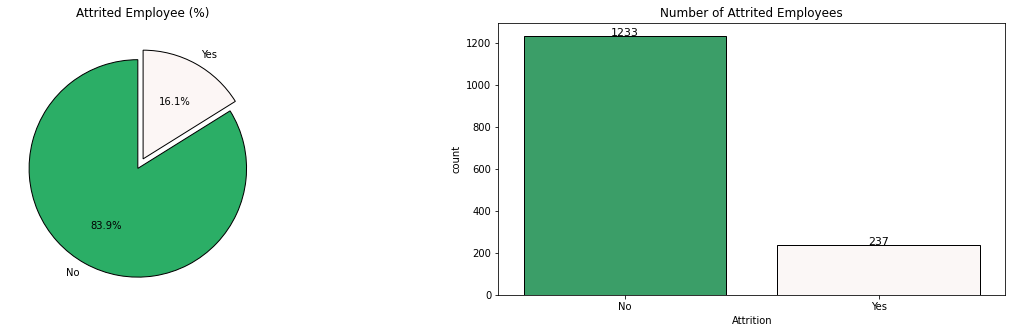

In [ ]:
l = list(df1['Attrition'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = list(tf1['Attrition'][j] for j in sorted(df1['Attrition'].unique())),autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Attrited Employee (%)');

plt.subplot(1,2,2)
ax = sns.countplot('Attrition',data = df1, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf1['Attrition'][j] for j in sorted(df1['Attrition'].unique()))
plt.title('Number of Attrited Employees');
plt.show()

In [ ]:
l1 = ['Age', 'Gender','MaritalStatus', 'Education', 
      'DistanceFromHome', 'TotalWorkingYears', 'NumCompaniesWorked'] # General Employee Information

l2 = ['EducationField', 'Department', 'JobLevel', 'JobRole', 
      'JobInvolvement', 'OverTime', 'JobSatisfaction'] # Employee Job Information

l3 = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 
      'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'WorkLifeBalance'] # Employee - Company Information

l4 = ['PercentSalaryHike', 'StockOptionLevel', 'BusinessTravel', 
      'PerformanceRating', 'EnvironmentSatisfaction', 'RelationshipSatisfaction'] # Company Information 

l5 = ['MonthlyIncome', 'HourlyRate', 'DailyRate', 'MonthlyRate'] # Finances

df2 = pd.DataFrame()
df2['Attrition'] = df1['Attrition']

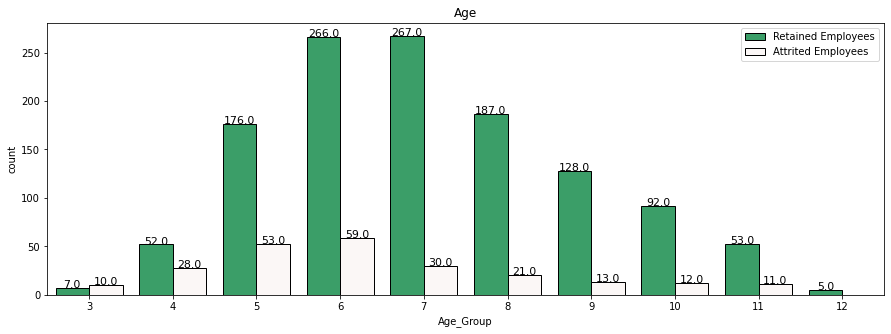

In [ ]:
df2['Age_Group'] = [int(i/5) for i in df1['Age']]

plt.figure(figsize = (15,5))
ax = sns.countplot('Age_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Age');

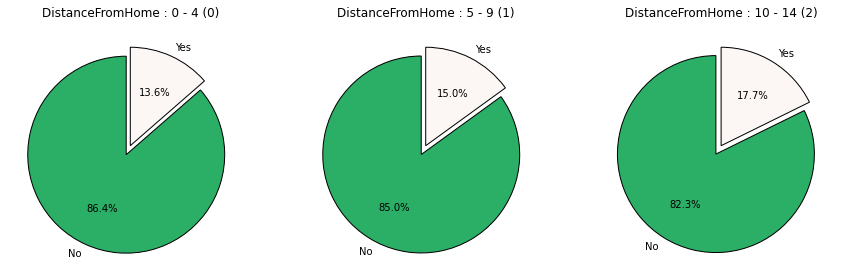

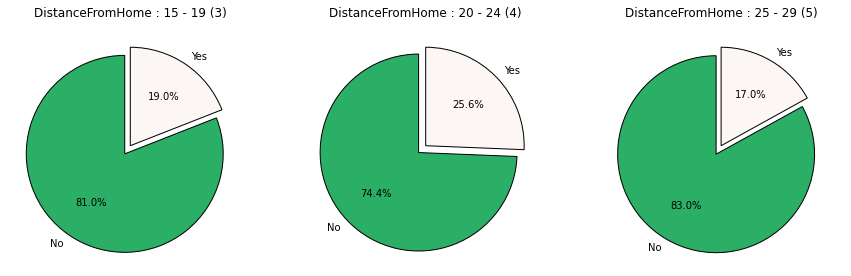

In [ ]:
df2['DistanceFromHome_Group'] = [int(i/5) for i in df1['DistanceFromHome']]

# plt.figure(figsize = (15,5))
# ax = sns.countplot('DistanceFromHome_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
# for rect in ax.patches:
#     ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
# plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right'); plt.title('DistanceFromHome');

for i in range(2):
    fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15)); a = 1
    for j in range(3):
        plt.subplot(1,3,a)
        if i == 0:
            l = list(df2.loc[(df2['DistanceFromHome_Group'] == j)]['Attrition'].value_counts())
        else:
            l = list(df2.loc[(df2['DistanceFromHome_Group'] == (j+3))]['Attrition'].value_counts())
            
        circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
        plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df2['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
                colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        if i == 0:
            plt.title('DistanceFromHome : ' + str(j*5) + ' - ' + str(j*5 + 4) + ' ('+ str(j) + ')');
        else:
            plt.title('DistanceFromHome : ' + str((j+3)*5) + ' - ' + str((j+3)*5 + 4) + ' ('+ str(j+3) + ')');
        a += 1

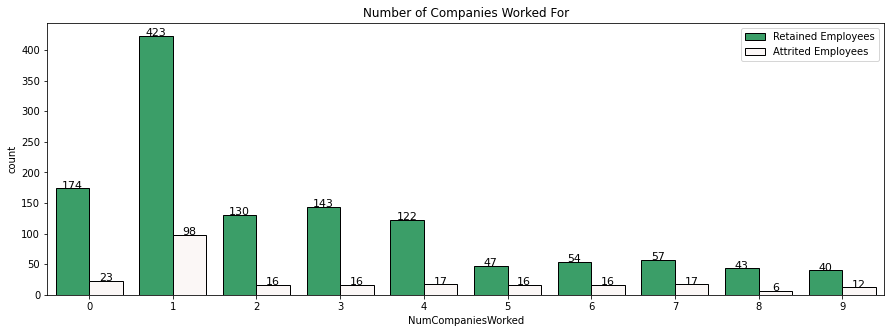

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.countplot('NumCompaniesWorked', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Number of Companies Worked For');

<Figure size 1080x360 with 0 Axes>

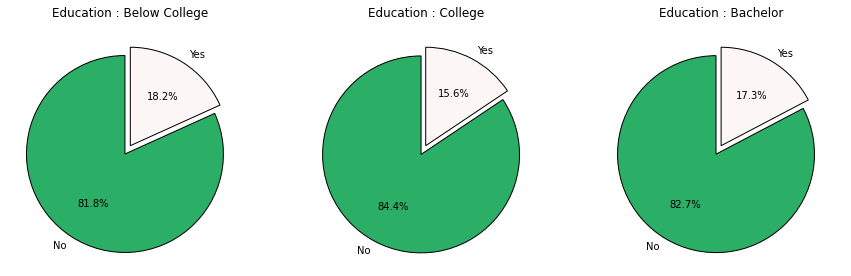

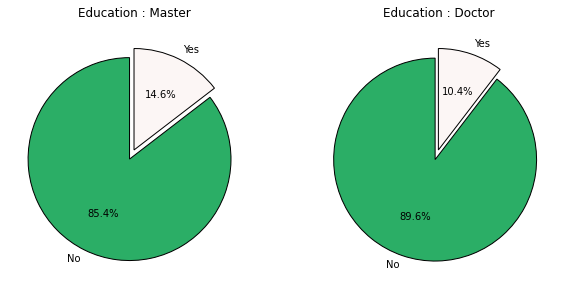

In [ ]:
plt.figure(figsize = (15,5))
# ax = sns.countplot('Education',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
# for rect in ax.patches:
#     ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
# ax.set_xticklabels(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
# plt.legend(['Retained Employees', 'Attrited Employees'])
# plt.title('Education');

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(1,4):
    plt.subplot(1,3,i)
    l = list(df2.loc[(df1['Education'] == i)]['Attrition'].value_counts())
    
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df2['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('Education : ' + ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'][i-1]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
for i in range(2):
    plt.subplot(1,2,i+1)
    l = list(df2.loc[(df1['Education'] == (i+4))]['Attrition'].value_counts())
    
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df2['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('Education : ' + ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'][i-2]);

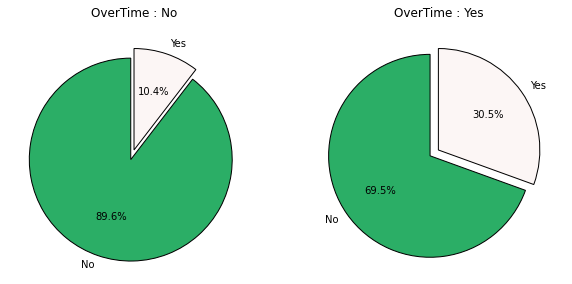

In [ ]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (10,10))
for i in range(len(df1['OverTime'].unique())):
    plt.subplot(1,2,i+1)
    l = list(df1.loc[(df1['OverTime'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(tf1['OverTime'][k] for k in sorted(df1['OverTime'].unique()))
    plt.title('OverTime : ' + b[i]);

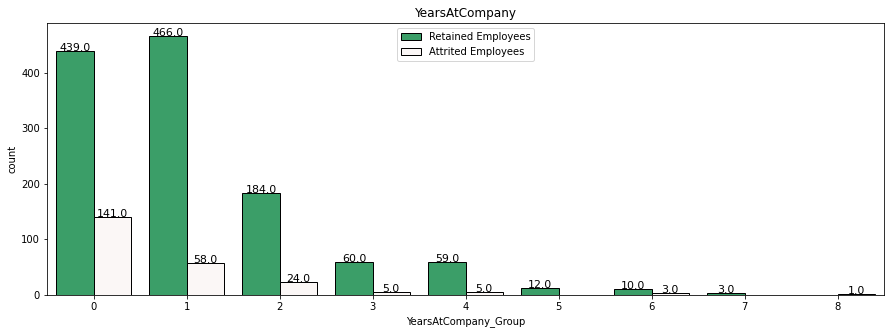

In [ ]:
df2['YearsAtCompany_Group'] = [int(i / 5) for i in df1['YearsAtCompany']]

plt.figure(figsize = (15, 5))
ax = sns.countplot('YearsAtCompany_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsAtCompany');

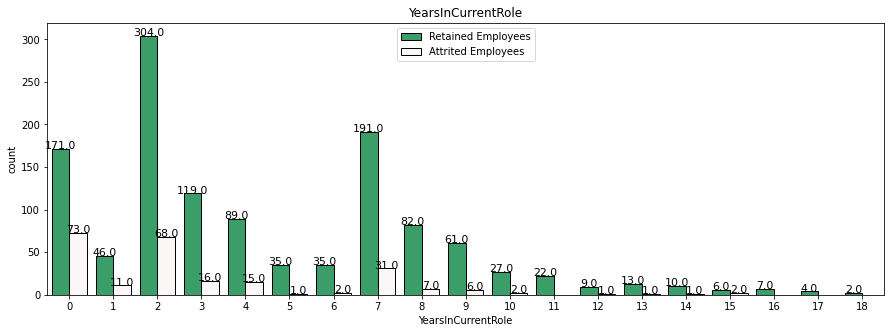

In [ ]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('YearsInCurrentRole', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsInCurrentRole');

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
cols = list(df1.columns)
cols.remove('Attrition')

over = SMOTE(sampling_strategy = 0.85)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.loc[:,cols]
t1 = df1.loc[:,'Attrition']

steps = [('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({1: 1048, 0: 1233})

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

In [ ]:
x_train_test = x_train.copy(deep = True)
x_train_test['Attrition'] = y_train

- In order to visualize the correlation matrix, we create a new dataframe that contains values from **x_train** & **y_train**.
- Thus, we reject anything outside the training data to avoid data leakage.

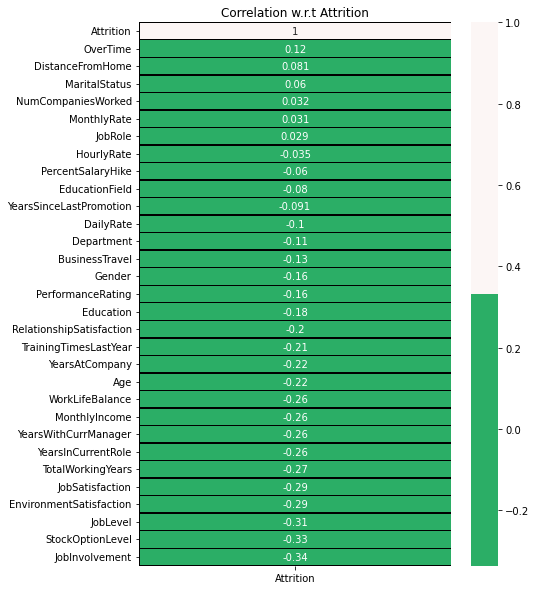

In [ ]:
corr = x_train_test.corrwith(x_train_test['Attrition']).sort_values(ascending = False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Attrition');

### Feature Selection for Categorical Features :

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

#### Mutual Information Test :

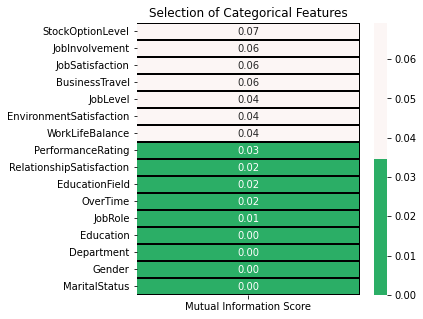

In [ ]:
features = x_train.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Mutual Information Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

#### Chi Squared Test :

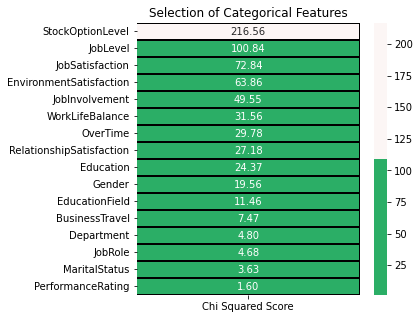

In [ ]:
features = x_train.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

### Feature Selection for Numerical Features :

#### ANOVA Test :

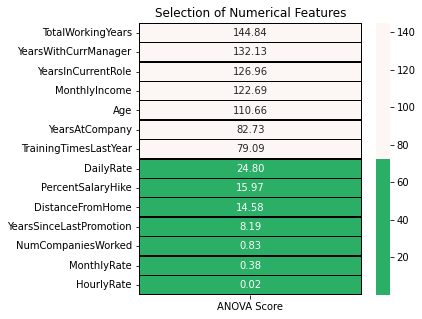

In [ ]:
from sklearn.feature_selection import f_classif

features = x_train.loc[:,discrete_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [ ]:
# x_train = x_train.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
#                                   'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
#                                   'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
#                                   'BusinessTravel', 'MaritalStatus' ,'Gender'])
x_train = x_train.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 
                                  'PerformanceRating', 'Department', 'JobRole', 'MaritalStatus'])
# x_test = x_test.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
#                                   'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
#                                   'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
#                                   'BusinessTravel', 'MaritalStatus' ,'Gender'])
x_test = x_test.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 
                                  'PerformanceRating', 'Department', 'JobRole', 'MaritalStatus'])

### Data Scaling :

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
x_train['MonthlyIncome'] = mms.fit_transform(x_train[['MonthlyIncome']]); x_test['MonthlyIncome'] = mms.transform(x_test[['MonthlyIncome']])
x_train['TotalWorkingYears'] = mms.fit_transform(x_train[['TotalWorkingYears']]); x_test['TotalWorkingYears'] = mms.transform(x_test[['TotalWorkingYears']])
x_train['YearsAtCompany'] = mms.fit_transform(x_train[['YearsAtCompany']]); x_test['YearsAtCompany'] = mms.transform(x_test[['YearsAtCompany']])
x_train['YearsInCurrentRole'] = mms.fit_transform(x_train[['YearsInCurrentRole']]); x_test['YearsInCurrentRole'] = mms.transform(x_test[['YearsInCurrentRole']])
x_train['YearsWithCurrManager'] = mms.fit_transform(x_train[['YearsWithCurrManager']]); x_test['YearsWithCurrManager'] = mms.transform(x_test[['YearsWithCurrManager']])
# x_train['NumCompaniesWorked'] = mms.fit_transform(x_train[['NumCompaniesWorked']]); x_test['NumCompaniesWorked'] = mms.transform(x_test[['NumCompaniesWorked']])
x_train['PercentSalaryHike'] = mms.fit_transform(x_train[['PercentSalaryHike']]); x_test['PercentSalaryHike'] = mms.transform(x_test[['PercentSalaryHike']])
x_train['YearsSinceLastPromotion'] = mms.fit_transform(x_train[['YearsSinceLastPromotion']]); x_test['YearsSinceLastPromotion'] = mms.transform(x_test[['YearsSinceLastPromotion']])
x_train['DistanceFromHome'] = mms.fit_transform(x_train[['DistanceFromHome']]); x_test['DistanceFromHome'] = mms.transform(x_test[['DistanceFromHome']])
# x_train['PerformanceRating'] = mms.fit_transform(x_train[['PerformanceRating']]); x_test['PerformanceRating'] = mms.transform(x_test[['PerformanceRating']])
# x_train['Department'] = mms.fit_transform(x_train[['Department']]); x_test['Department'] = mms.transform(x_test[['Department']])
# x_train['JobRole'] = mms.fit_transform(x_train[['JobRole']]); x_test['JobRole'] = mms.transform(x_test[['JobRole']])
x_train['EducationField'] = mms.fit_transform(x_train[['EducationField']]); x_test['EducationField'] = mms.transform(x_test[['EducationField']])
x_train['BusinessTravel'] = mms.fit_transform(x_train[['BusinessTravel']]); x_test['BusinessTravel'] = mms.transform(x_test[['BusinessTravel']])
x_train['Gender'] = mms.fit_transform(x_train[['Gender']]); x_test['Gender'] = mms.transform(x_test[['Gender']])

# Standardization
x_train['Age'] = ss.fit_transform(x_train[['Age']]); x_test['Age'] = ss.transform(x_test[['Age']])
x_train['Education'] = ss.fit_transform(x_train[['Education']]); x_test['Education'] = ss.transform(x_test[['Education']])
x_train['EnvironmentSatisfaction'] = ss.fit_transform(x_train[['EnvironmentSatisfaction']]); x_test['EnvironmentSatisfaction'] = ss.transform(x_test[['EnvironmentSatisfaction']])
x_train['JobInvolvement'] = ss.fit_transform(x_train[['JobInvolvement']]); x_test['JobInvolvement'] = ss.transform(x_test[['JobInvolvement']])
x_train['JobLevel'] = ss.fit_transform(x_train[['JobLevel']]); x_test['JobLevel'] = ss.transform(x_test[['JobLevel']])
x_train['JobSatisfaction'] = ss.fit_transform(x_train[['JobSatisfaction']]); x_test['JobSatisfaction'] = ss.transform(x_test[['JobSatisfaction']])
x_train['OverTime'] = ss.fit_transform(x_train[['OverTime']]); x_test['OverTime'] = ss.transform(x_test[['OverTime']])
x_train['RelationshipSatisfaction'] = ss.fit_transform(x_train[['RelationshipSatisfaction']]); x_test['RelationshipSatisfaction'] = ss.transform(x_test[['RelationshipSatisfaction']])
x_train['StockOptionLevel'] = ss.fit_transform(x_train[['StockOptionLevel']]); x_test['StockOptionLevel'] = ss.transform(x_test[['StockOptionLevel']])
x_train['TrainingTimesLastYear'] = ss.fit_transform(x_train[['TrainingTimesLastYear']]); x_test['TrainingTimesLastYear'] = ss.transform(x_test[['TrainingTimesLastYear']])
x_train['WorkLifeBalance'] = ss.fit_transform(x_train[['WorkLifeBalance']]); x_test['WorkLifeBalance'] = ss.transform(x_test[['WorkLifeBalance']])
# x_train['MonthlyRate'] = ss.fit_transform(x_train[['MonthlyRate']]); x_test['MonthlyRate'] = ss.transform(x_test[['MonthlyRate']])
# x_train['HourlyRate'] = ss.fit_transform(x_train[['HourlyRate']]); x_test['HourlyRate'] = ss.transform(x_test[['HourlyRate']])
x_train['DailyRate'] = ss.fit_transform(x_train[['DailyRate']]); x_test['DailyRate'] = ss.transform(x_test[['DailyRate']])
# x_train['MaritalStatus'] = ss.fit_transform(x_train[['MaritalStatus']]); x_test['MaritalStatus'] = ss.transform(x_test[['MaritalStatus']])



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### 1] XGBoostClassifier :

In [ ]:
from xgboost import XGBClassifier

In [ ]:
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  93.75%
ROC_AUC Score :  90.08%


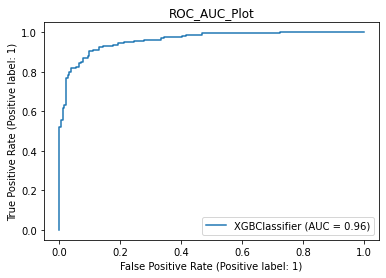

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       183
           1       0.89      0.90      0.89       160

    accuracy                           0.90       343
   macro avg       0.90      0.90      0.90       343
weighted avg       0.90      0.90      0.90       343



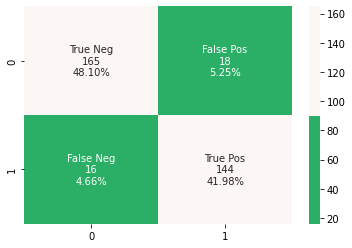

In [ ]:
model(classifier_xgb,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_xgb,x_test.values,y_test.values)

### 2] LGBMClassifier :

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  93.77%
ROC_AUC Score :  88.99%


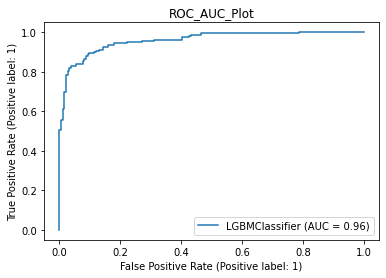

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       183
           1       0.87      0.90      0.88       160

    accuracy                           0.89       343
   macro avg       0.89      0.89      0.89       343
weighted avg       0.89      0.89      0.89       343



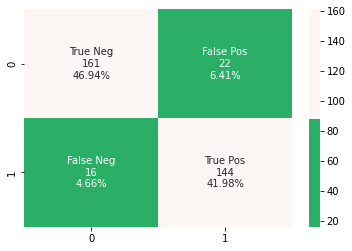

In [ ]:
model(classifier_lgbm,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_lgbm,x_test.values,y_test.values)

### 3] Decision Tree Classifier :

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score :  81.87%
ROC_AUC Score :  80.28%


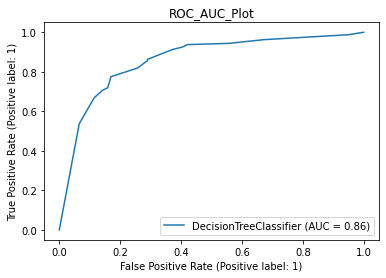

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       183
           1       0.80      0.78      0.79       160

    accuracy                           0.80       343
   macro avg       0.80      0.80      0.80       343
weighted avg       0.80      0.80      0.80       343



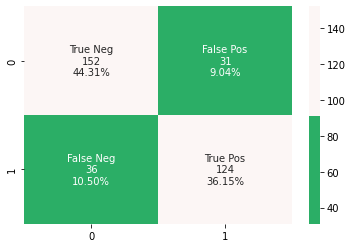

In [ ]:
model(classifier_dt,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_dt,x_test.values,y_test.values)

### 4] RandomForest Classifier :

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  88.55%
ROC_AUC Score :  84.89%


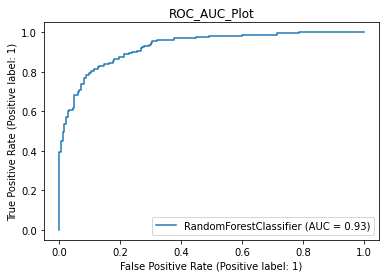

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       183
           1       0.86      0.81      0.84       160

    accuracy                           0.85       343
   macro avg       0.85      0.85      0.85       343
weighted avg       0.85      0.85      0.85       343



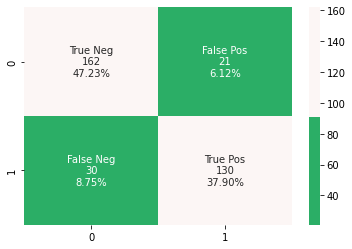

In [ ]:
model(classifier_rf,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_rf,x_test.values,y_test.values)

### ML Alogrithm Results Table :

#### Results Table for models based on Statistical Test : 

|Sr. No.|ML Algorithm|ROC AUC Score|F1 Score (Attrition)| F1 Score (No Attrition)|
|-|-|-|-|-|
|1|XGB Classifier|89.81%|89%|90%|
|2|LGBM Regression|90.36%|90%|91%|
|3|Decision Tree Classifier|81.57%|80%|83%|
|4|RandomForest Classifier|82.90%|82%|84%|

### ML Alogrithm Results Table :

#### Results Table for models not based on Statistical Test (Not Drop Any Feature): 

|Sr. No.|ML Algorithm|ROC AUC Score|F1 Score (Attrition)| F1 Score (No Attrition)|
|-|-|-|-|-|
|1|XGB Classifier|89.14%|88%|90%|
|2|LGBM Regression|89.50%|89%|90%|
|3|Decision Tree Classifier|78.95%|77%|81%|
|4|RandomForest Classifier|79.54%|77%|83%|

### ML Alogrithm Results Table :

#### Results Table for models based on Statistical Test (Only Drop half of the features): 

|Sr. No.|ML Algorithm|ROC AUC Score|F1 Score (Attrition)| F1 Score (No Attrition)|
|-|-|-|-|-|
|1|XGB Classifier|90.08%|89%|90%|
|2|LGBM Regression|88.99%|88%|89%|
|3|Decision Tree Classifier|80.28%|79%|82%|
|4|RandomForest Classifier|84.89%|84%|86%|